<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Access DB2 on Cloud using Python

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create a table
*   Insert data into the table
*   Query data from the table
*   Retrieve the result set into a pandas dataframe
*   Close the database connection


**Notice:** Please follow the instructions given in the first Lab of this course to Create a database service instance of Db2 on Cloud.

## Task 1: Import the `ibm_db` Python library

The `ibm_db` [API ](https://pypi.python.org/pypi/ibm_db/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2022-01-01) provides a variety of useful Python functions for accessing and manipulating data in an IBM® data server database, including functions for connecting to a database, preparing and issuing SQL statements, fetching rows from result sets, calling stored procedures, committing and rolling back transactions, handling errors, and retrieving metadata.

We import the ibm_db library into our Python Application

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you may need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [ ]:
# These libraries are pre-installed in SN Labs. If running in another environment please uncomment lines below to install them:
# !pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
# Ensure we don't load_ext with sqlalchemy>=1.4 (incompadible)
# !pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
# !pip install ipython-sql

In [1]:
import ibm_db

When the command above completes, the `ibm_db` library is loaded in your notebook.

## Task 2: Identify the database connection credentials

Connecting to dashDB or DB2 database requires the following information:

*   Driver Name
*   Database name
*   Host DNS name or IP address
*   Host port
*   Connection protocol
*   User ID
*   User Password

**Notice:** To obtain credentials please refer to the instructions given in the first Lab of this course

Now enter your database credentials below

Replace the placeholder values in angular brackets <> below with your actual database credentials

e.g. replace "database" with "BLUDB"


In [2]:
#Replace the placeholder values with the actuals for your Db2 Service Credentials
dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb"            # e.g. "BLUDB"
dsn_hostname = "125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud" # e.g.: "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_port = "30426"                # e.g. "32733" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_uid = "qhw37198"        # e.g. "abc12345"
dsn_pwd = "uNYqNOStW2Z8Jen4"      # e.g. "7dBZ3wWt9XN6$o0J"
dsn_security = "SSL"              #i.e. "SSL"



## Task 3: Create the database connection

Ibm_db API uses the IBM Data Server Driver for ODBC and CLI APIs to connect to IBM DB2 and Informix.

Create the database connection


In [3]:
#Create database connection
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  bludb as user:  qhw37198 on host:  125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud


## Task 4: Create a table in the database

In this step we will create a table in the database with following details:

<img src = "https://ibm.box.com/shared/static/ztd2cn4xkdoj5erlk4hhng39kbp63s1h.jpg" align="center">


In [4]:
#Lets first drop the table INSTRUCTOR in case it exists from a previous attempt
dropQuery = "drop table INSTRUCTOR"

#Now execute the drop statment
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

Exception: [IBM][CLI Driver][DB2/LINUXX8664] SQL0204N  "QHW37198.INSTRUCTOR" is an undefined name.  SQLSTATE=42704 SQLCODE=-204

## Dont worry if you get this error:

If you see an exception/error similar to the following, indicating that INSTRUCTOR is an undefined name, that's okay. It just implies that the INSTRUCTOR table does not exist in the table - which would be the case if you had not created it previously.

Exception: \[IBM]\[CLI Driver]\[DB2/LINUXX8664] SQL0204N  "ABC12345.INSTRUCTOR" is an undefined name.  SQLSTATE=42704 SQLCODE=-204


In [7]:
#Construct the Create Table DDL statement - replace the ... with rest of the statement
createQuery = "create table INSTRUCTOR(id INTEGER PRIMARY KEY NOT NULL, fname VARCHAR(20), lname VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2))"
#Now fill in the name of the method and execute the statement
createStmt = ibm_db.exec_immediate(conn, createQuery)

Exception: [IBM][CLI Driver][DB2/LINUXX8664] SQL0601N  The name of the object to be created is identical to the existing name "QHW37198.INSTRUCTOR" of type "TABLE".  SQLSTATE=42710 SQLCODE=-601

<details><summary>Click here for the solution</summary>

```python
createQuery = "create table INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2))"

createStmt = ibm_db.exec_immediate(conn,createQuery)
```

</details>


## Task 5: Insert data into the table

In this step we will insert some rows of data into the table.

The INSTRUCTOR table we created in the previous step contains 3 rows of data:

<img src="https://ibm.box.com/shared/static/j5yjassxefrjknivfpekj7698dqe4d8i.jpg" align="center">

We will start by inserting just the first row of data, i.e. for instructor Rav Ahuja


In [10]:
#Construct the query - replace ... with the insert statement
insertQuery = "insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')"

#execute the insert statement
insertStmt = ibm_db.exec_immediate(conn, insertQuery)

<details><summary>Click here for the solution</summary>

```python
insertQuery = "insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')"

insertStmt = ibm_db.exec_immediate(conn, insertQuery)
```

</details>


Now use a single query to insert the remaining two rows of data


In [9]:
#replace ... with the insert statement that inerts the remaining two rows of data
insertQuery2 = "insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')"

#execute the statement
insertStmt2 = ibm_db.exec_immediate(conn, insertQuery2)

<details><summary>Click here for the solution</summary>

```python
insertQuery2 = "insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')"

insertStmt2 = ibm_db.exec_immediate(conn, insertQuery2)

```

</details>


## Task 6: Query data in the table

In this step we will retrieve data we inserted into the INSTRUCTOR table.


In [11]:
#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

#Fetch the Dictionary (for the first row only) - replace ... with your code
ibm_db.fetch_both(selectStmt)

{'ID': 2,
 0: 2,
 'FNAME': 'Raul',
 1: 'Raul',
 'LNAME': 'Chong',
 2: 'Chong',
 'CITY': 'Markham',
 3: 'Markham',
 'CCODE': 'CA',
 4: 'CA'}

<details><summary>Click here for the solution</summary>

```python
#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

#Fetch the Dictionary (for the first row only)
ibm_db.fetch_both(selectStmt)

```

</details>


In [12]:
#Fetch the rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectStmt) != False:
   print (" ID:",  ibm_db.result(selectStmt, 0), " FNAME:",  ibm_db.result(selectStmt, "FNAME"))

 ID: 3  FNAME: Hima
 ID: 1  FNAME: Rav


<details><summary>Click here for the solution</summary>

```python
#Fetch the rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectStmt) != False:
    print (" ID:",  ibm_db.result(selectStmt, 0), " FNAME:",  ibm_db.result(selectStmt, "FNAME"))

```

</details>


Bonus: now write and execute an update statement that changes the Rav's CITY to MOOSETOWN


In [14]:
#Enter your code below
updateQuery = "update INSTRUCTOR set CITY='MOOSETOWN' where FNAME='Rav'"
updateStmt = ibm_db.exec_immediate(conn, updateQuery)

<details><summary>Click here for the solution</summary>

```python
updateQuery = "update INSTRUCTOR set CITY='MOOSETOWN' where FNAME='Rav'"
updateStmt = ibm_db.exec_immediate(conn, updateQuery)

```

</details>


## Task 7: Retrieve data into Pandas

In this step we will retrieve the contents of the INSTRUCTOR table into a Pandas dataframe


In [4]:
import pandas
import ibm_db_dbi

In [5]:
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

In [39]:
#query statement to retrieve all rows in INSTRUCTOR table
#selectQuery = "select m.membername, t.merchantname, sum(t.amount) as amount from membertransaction t inner join member m on t.memberid = m.memberid group by m.membername, t.merchantname order by t.memberid"

selectQuery = "select m.membername, sum(amount) as amount from membertransaction t inner join member m on t.memberid = m.memberid group by m.membername"

#retrieve the query results into a pandas dataframe
pdf = pandas.read_sql(selectQuery, pconn)

#print just the LNAME for first row in the pandas data frame

In [40]:
#print the entire data frame
pdf

,MEMBERNAME,AMOUNT
0,Joe,702.41
1,Marcus,176.55
2,Sharon,4177.39


In [36]:
import matplotlib.pyplot as plt

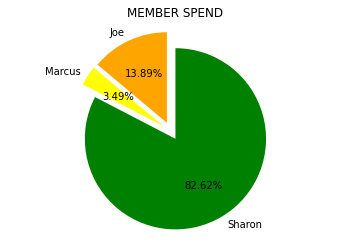

In [46]:
labels = pdf['MEMBERNAME']

colors = ['orange', 'yellow', 'green']

sizes = pdf['AMOUNT']

plt.pie(sizes, labels=labels, colors=colors, startangle=90, explode=(0.1, 0.1, 0.1), autopct='%1.2f%%')

plt.title('MEMBER SPEND')

plt.axis('equal')

plt.show()

In [23]:
index

0        Joe
1        Joe
2        Joe
3        Joe
4        Joe
5     Marcus
6     Marcus
7     Sharon
8     Sharon
9     Sharon
10    Sharon
11    Sharon
12    Sharon
Name: MEMBERNAME, dtype: object

In [37]:
pivotdf=pdf.pivot(index = 'MEMBERNAME',columns = 'MERCHANTNAME', values = 'AMOUNT')

In [38]:
pivotdf

MERCHANTNAME,Aliexpress,Amazon,Apple,BestBuy,Burger King,Canada Computers,Dell,McDonald's,Microsoft,Shopper's Drugmart,Staples,The Source
MEMBERNAME,,,,,,,,,,,,
Joe,NaN,NaN,NaN,100.0,NaN,475.73,NaN,13.38,NaN,84.82,28.48,NaN
Marcus,1.23,175.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sharon,NaN,NaN,84.21,NaN,25.59,NaN,847.28,18.38,3201.93,NaN,NaN,0.0


In [31]:
index = pdf['MEMBERNAME']

KeyError: 'MEMBERNAME'

In [ ]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

Once the data is in a Pandas dataframe, you can do the typical pandas operations on it.

For example you can use the shape method to see how many rows and columns are in the dataframe


In [19]:
pdf.shape

(3, 5)

## Task 8: Close the Connection

We free all resources by closing the connection. Remember that it is always important to close connections so that we can avoid unused connections taking up resources.


In [20]:
ibm_db.close(conn)

True

## Summary

In this tutorial you established a connection to a database instance of DB2 Warehouse on Cloud from a Python notebook using ibm_db API. Then created a table and insert a few rows of data into it. Then queried the data. You also retrieved the data into a pandas dataframe.


## Author

<a href="https://www.linkedin.com/in/ravahuja/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2022-01-01" target="_blank">Rav Ahuja</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2021-11-17        | 2.2     | Lakshmi    | Updated library                    |
| 2021-07-09        | 2.1     | Malika     | Updated connection string          |
| 2020-08-28        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
